In [6]:
import warnings #To ignore all the warnings
warnings.filterwarnings('ignore')
import pandas as pd #For importing the dataset.
import re   #to work with strings
import seaborn as sns   #For data visualization
from sklearn.feature_extraction.text import TfidfVectorizer #For importing the model, accuracy module, and TfidfVectorizer.
import matplotlib.pyplot as plt #To plot the visualization. Also used Wordcloud for that.
from wordcloud import WordCloud


In [7]:
import nltk #for text analysis
nltk.download('stopwords')
from nltk.corpus import stopwords   #stopwords are the words which are not important if removed


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [8]:
data = pd.read_csv('flipkart_data.csv')
print(type(data))
data.head()


<class 'pandas.core.frame.DataFrame'>


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [9]:
# unique ratings
pd.unique(data['rating'])   #returnes the unique values


array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

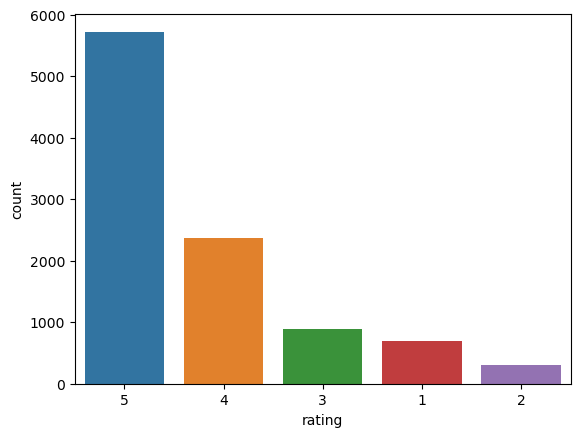

In [10]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index) #without hue it is single variable to show


In [11]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
	if data['rating'][i] >= 5:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg
data.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [12]:
# print(data.review)
# type(data.review)
data.review

0       It was nice produt. I like it's design a lot. ...
1       awesome sound....very pretty to see this nd th...
2       awesome sound quality. pros 7-8 hrs of battery...
3       I think it is such a good product not only as ...
4       awesome bass sound quality very good bettary l...
                              ...                        
9971                                        GoodREAD MORE
9972    Everything is amazimg but the built is very li...
9973                                        GoodREAD MORE
9974         Best headphone i have ever used....READ MORE
9975                                        NiceREAD MORE
Name: review, Length: 9976, dtype: object

In [13]:
data.review.values

array(["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE",
       'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE',
       'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE',
       ..., 'GoodREAD MORE',
       'Best headphone i have ever used....READ MORE', 'NiceREAD MORE'],
      dtype=object)

In [14]:
from tqdm import tqdm


for i in tqdm(range(int(9e6))): #9e6:9*10^6
	pass


100%|██████████| 9000000/9000000 [00:07<00:00, 1204692.35it/s]


In [15]:
import re

print(re.sub(r'\sAND\s', ' & ', 'Baked Beans And Spam ANDerson',    #just and word which either sides are null is substitued
             flags=re.IGNORECASE))

# Python program to strip punctuation from string
# Using Regular Expressions (REGEX) 

# String with punctuation's
string = "Hello!!!, $#@!*()&,.This is ##STechies$$."

final_string = re.sub(r'[^\w\s]','',string)

# Print final String
print('String with Punctuation: ', string)
print('String without Punctuation: ', final_string)

Baked Beans & Spam ANDerson
String with Punctuation:  Hello!!!, $#@!*()&,.This is ##STechies$$.
String without Punctuation:  Hello This is STechies


In [16]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))   #stopwords:useless words in programming and searching

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
import nltk

word_data = "It ORIGInated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
nltk_tokens = nltk.word_tokenize(word_data) #converts a string to individual words
print ('indivual words:',nltk_tokens)
print(type(nltk_tokens))
print(len(nltk_tokens))
print(nltk_tokens[1].lower())   #converts the word to lower case

indivual words: ['It', 'ORIGInated', 'from', 'the', 'idea', 'that', 'there', 'are', 'readers', 'who', 'prefer', 'learning', 'new', 'skills', 'from', 'the', 'comforts', 'of', 'their', 'drawing', 'rooms']
<class 'list'>
21
originated


In [18]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)	#deletes all non alphanumeric characters from the sentence

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [19]:
mysentence=["a Good Boy is a hard giver!!! A good GIRL has bad habbots$$$$$ yes????","salam pesare GOL$%^"]
print(preprocess_text(mysentence))

100%|██████████| 2/2 [00:00<00:00, 184.32it/s]

['good boy hard giver good girl bad habbots yes', 'salam pesare gol']


In [20]:
preprocessed_review = preprocess_text(data['review'].values)    #data['review'].values is a list
data['review'] = preprocessed_review
preprocessed_review #it's a list


100%|██████████| 9976/9976 [02:07<00:00, 78.31it/s] 


['nice produt like design lot easy carry looked stylishread',
 'awesome soundvery pretty see nd sound quality good wish take product loved product read',
 'awesome sound quality pros 78 hrs battery life including 45 mins approx call timeawesome sound output bass treble really clear without equaliser equaliser sound wary depends handset sound qualityweightless carry head toomic good traffic good 325535mm option really important mention really expecting leading brands implement thisconsvery tight ears adjusters ok tightread',
 'think good product per quality also design quite good using product january pandamic situation became useful helpful overall bass sound quality pretty good another thing give sigh relief provide wire help case lacking chargesread',
 'awesome bass sound quality good bettary long life purchase rs999 really grateful product dont forget likeread',
 'awsome sound powerful bass battery backup also excellent loved bass im huge lover music bass design build also niceand f

In [21]:
data.head()


,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [22]:
ser=data["label"].value_counts()
print(ser)
ser[1]  #ser is a series and ser[1] does not point to second index but points to elemnet 1,as labels are either 1 or 0
        #I changed the lables to 0 and 2 ans ser[2] pointed to lables which were 2 not third indexes

1    5726
0    4250
Name: label, dtype: int64


5726

In [23]:
print(data)
data['review'][data['label'] == 1]

# data['label']

                                                 review  rating  label
0     nice produt like design lot easy carry looked ...       5      1
1     awesome soundvery pretty see nd sound quality ...       5      1
2     awesome sound quality pros 78 hrs battery life...       4      0
3     think good product per quality also design qui...       5      1
4     awesome bass sound quality good bettary long l...       5      1
...                                                 ...     ...    ...
9971                                           goodread       5      1
9972                 everything amazimg built lightread       5      1
9973                                           goodread       5      1
9974                       best headphone ever usedread       5      1
9975                                           niceread       5      1

[9976 rows x 3 columns]


0       nice produt like design lot easy carry looked ...
1       awesome soundvery pretty see nd sound quality ...
3       think good product per quality also design qui...
4       awesome bass sound quality good bettary long l...
5       awsome sound powerful bass battery backup also...
                              ...                        
9971                                             goodread
9972                   everything amazimg built lightread
9973                                             goodread
9974                         best headphone ever usedread
9975                                             niceread
Name: review, Length: 5726, dtype: object

In [24]:
 for word in data['review'][data['label'] == 1]:
    print(word)

nice produt like design lot easy carry looked stylishread
awesome soundvery pretty see nd sound quality good wish take product loved product read
think good product per quality also design quite good using product january pandamic situation became useful helpful overall bass sound quality pretty good another thing give sigh relief provide wire help case lacking chargesread
awesome bass sound quality good bettary long life purchase rs999 really grateful product dont forget likeread
awsome sound powerful bass battery backup also excellent loved bass im huge lover music bass design build also niceand first time bought headphone electronics item glad say first time loved excellent product thanks boat making nice product keep making thanks flipkart team delivering nice product risking lifread
first want talk sound quality sound quality best price segment bass really punchy mids also good high volumes sound cracks bit otherwise really nice 910then come build quality build quality amazing can

In [25]:
consolidated=' '.join(word for word in data['review'][data['label'] == 1].astype(str))
consolidated

'nice produt like design lot easy carry looked stylishread awesome soundvery pretty see nd sound quality good wish take product loved product read think good product per quality also design quite good using product january pandamic situation became useful helpful overall bass sound quality pretty good another thing give sigh relief provide wire help case lacking chargesread awesome bass sound quality good bettary long life purchase rs999 really grateful product dont forget likeread awsome sound powerful bass battery backup also excellent loved bass im huge lover music bass design build also niceand first time bought headphone electronics item glad say first time loved excellent product thanks boat making nice product keep making thanks flipkart team delivering nice product risking lifread first want talk sound quality sound quality best price segment bass really punchy mids also good high volumes sound cracks bit otherwise really nice 910then come build quality build quality amazing ca

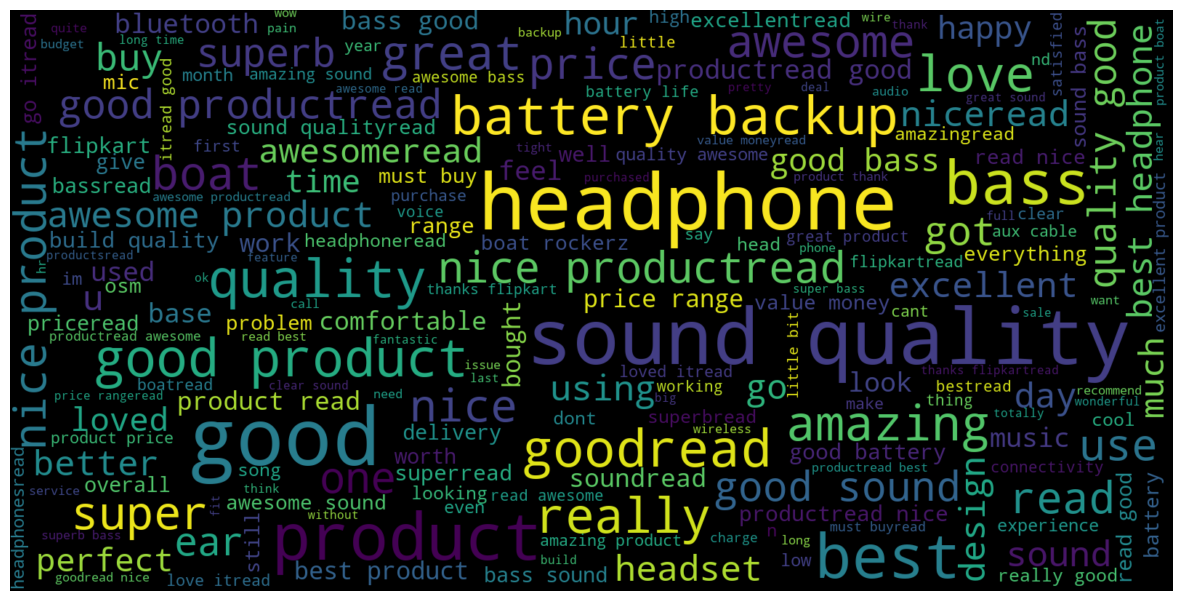

In [26]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)	#random_state=21 gurantees the same random numbers the other time I or anyone else
														# runs this code
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')	#generates wordcloud using consolidated
																		# interpolation='bilinear' smoothes the words edges
plt.axis('off')
plt.show()


In [27]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# assign documents
d0 = 'Geeks for geeks'
d1 = 'Geeks'
d2 = 'r2j'

# merge documents into a single corpus
string = [d0, d1, d2]
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)
print(result)
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
	print(ele1, ':', ele2)


  (0, 0)	0.5493512310263033
  (0, 1)	0.8355915419449176
  (1, 1)	1.0
  (2, 2)	1.0

idf values:
for : 1.6931471805599454
geeks : 1.2876820724517808
r2j : 1.6931471805599454


In [32]:
cv = TfidfVectorizer(max_features=2500)
# X = cv.fit_transform(data['review'] )
X = cv.fit_transform(data['review'] ).toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(metrics.accuracy_score(y_train,pred))


0.9247344007182403


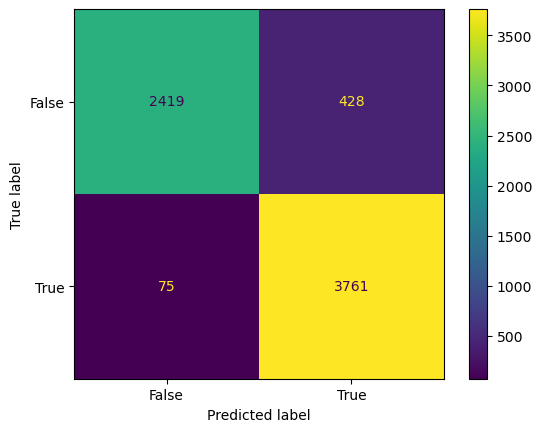

In [38]:
cm = metrics.confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()
